In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
mpl.style.use('seaborn-muted')

sns.set(style='white', palette='muted', color_codes=True)

In [2]:
import numpy as np
import math

from scipy import stats

from lint_analysis.token_offsets import Dataset

In [3]:
a = Dataset.from_local('a.json')

In [4]:
def make_bin(offset, bin_count):
    return math.floor(offset * bin_count) if offset < 1 else bin_count-1

In [5]:
counts = []
for text in a.texts():
    
    row = np.zeros(5)
    
    for offset in text['offsets']:
        b = make_bin(offset, len(row))
        row[b] += 1
        
    counts.append(row / sum(row))

/Users/dclure/Projects/lint-analysis/env/lib/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


In [6]:
counts = np.stack(counts)
counts = np.nan_to_num(counts)

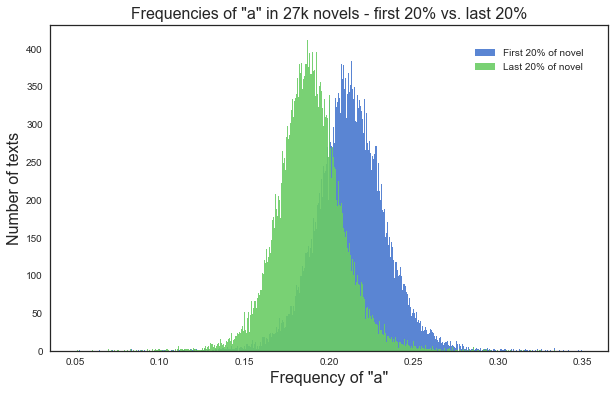

In [28]:
plt.figure(figsize=(10,6))
plt.rc('axes', labelsize=16)
plt.rc('axes', titlesize=16)
plt.title('Frequencies of "a" in 27k novels - first 20% vs. last 20%')
plt.xlabel('Frequency of "a"')
plt.ylabel('Number of texts')

xlim = (0.05, 0.35)

_ = plt.hist(counts[:,0], bins=500, range=xlim, alpha=0.9, label='First 20% of novel')
_ = plt.hist(counts[:,4], bins=500, range=xlim, alpha=0.9, label='Last 20% of novel')

plt.legend(loc=0, borderaxespad=2)